In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_csv("../data/misgrosi_candidate.csv")
df_density = pd.read_csv('../../density.csv')

In [2]:
df.head()

,Name,Intro,Location,Role,Post Code,Stadt
0,Nani Moni,Einfach ein lässiges Grosi sy,4900 Langenthal,Tages-Grosi,4900.0,Langenthal
1,Jida,Betreue Kinder aus allen Kulturen,4051 Basel,Tages-Grosi,4051.0,Basel
2,Phoebe-Grosi,Bin da offen und neugierig,8105 Watt,Tages-Grosi,8105.0,Watt
3,Wunsch-Omi Elvira,"Jungebliebene, aktive mitten im Leben stehende...",9533 Kirchberg,Tages-Grosi,9533.0,Kirchberg
4,Grosi claudia,Bin aufgestellt und kinder lieb,3363 Oberön,Tages-Grosi,3363.0,Oberön


In [3]:
df_density

,Unnamed: 0,Post Code,City,Region,Area,Population,Density
0,0,1000,Lausanne,Vaud,14.100,4072.0,288.794326
1,1,1001,Lausanne,Vaud,NaN,NaN,NaN
2,2,1002,Lausanne,Vaud,NaN,NaN,NaN
3,3,1003,Lausanne,Vaud,0.820,6707.0,8179.268293
4,4,1004,Lausanne,Vaud,2.272,31230.0,13745.598592
...,...,...,...,...,...,...,...
3518,3518,9414,Reute,Appenzell Ausserrhoden,NaN,NaN,NaN
3519,3519,9426,NaN,Appenzell Ausserrhoden,1.381,931.0,674.149167
3520,3520,9427,NaN,Appenzell Ausserrhoden,6.900,1846.0,267.536232
3521,3521,9428,NaN,Appenzell Ausserrhoden,7.000,1995.0,285.000000


In [4]:
def post(row):
    try:
        post_stadt = row['Location'].split()
        if post_stadt[0].isdigit():
            val = int(post_stadt[0])
        else:
            val = None
    except:
        val = str(row['Location'])
    
    return val
        
df['Post Code'] = df.apply(post, axis=1)

In [5]:
def stadt(row):
    try:
        post_stadt = row['Location'].split()

        if len(post_stadt) == 2 :
            val = post_stadt[1]
        elif not post_stadt[0].isdigit():
            val = post_stadt[0]
        else:
            val = None
    except:
        val = None
    return val
        
df['Stadt'] = df.apply(stadt, axis=1)

In [6]:
df.head()

,Name,Intro,Location,Role,Post Code,Stadt
0,Nani Moni,Einfach ein lässiges Grosi sy,4900 Langenthal,Tages-Grosi,4900,Langenthal
1,Jida,Betreue Kinder aus allen Kulturen,4051 Basel,Tages-Grosi,4051,Basel
2,Phoebe-Grosi,Bin da offen und neugierig,8105 Watt,Tages-Grosi,8105,Watt
3,Wunsch-Omi Elvira,"Jungebliebene, aktive mitten im Leben stehende...",9533 Kirchberg,Tages-Grosi,9533,Kirchberg
4,Grosi claudia,Bin aufgestellt und kinder lieb,3363 Oberön,Tages-Grosi,3363,Oberön


In [7]:
# Data group by post code
df_count = df.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_count

,Post Code,Counts
0,2540,1
1,3027,1
2,3052,1
3,3053,1
4,3063,1
...,...,...
79,78351,1
80,79639,1
81,79875,1
82,80992,1


In [8]:
# Merge grouped aby data with density.csv
df = df_count.merge(df_density,on = 'Post Code',how = 'left')
df = df.dropna(subset = ['Density'])
df['gig_per'] = 100*df['Counts']/df['Population']
# Define urban column
df['urban'] = 'unknown'
df.loc[df['Density']<400, 'urban'] = 'rural'
df.loc[(df['Density']>=400) & (df['Density']<1500), 'urban'] = 'urban'
df.loc[df['Density']>1500, 'urban'] = 'urban center'
df = df.rename(columns={'Counts': 'gig_num'})

df.head()

,Post Code,gig_num,Unnamed: 0,City,Region,Area,Population,Density,gig_per,urban
0,2540,1,1588.0,NaN,Canton of Solothurn,26.00,17939.0,689.961538,0.005574,urban
1,3027,1,1030.0,NaN,Canton of Bern,6.30,12732.0,2020.952381,0.007854,urban center
2,3052,1,1052.0,NaN,Canton of Bern,6.40,12273.0,1917.656250,0.008148,urban center
3,3053,1,1053.0,Münchenbuchsee,Canton of Bern,14.90,10004.0,671.409396,0.009996,urban
4,3063,1,1055.0,Ittigen,Canton of Bern,3.36,9864.0,2935.714286,0.010138,urban center


In [9]:
# Count job number of urban center, urban and rural 
urban_count = df.groupby('urban')['urban'].count()
urban_count

urban
rural           18
urban           33
urban center    25
Name: urban, dtype: int64

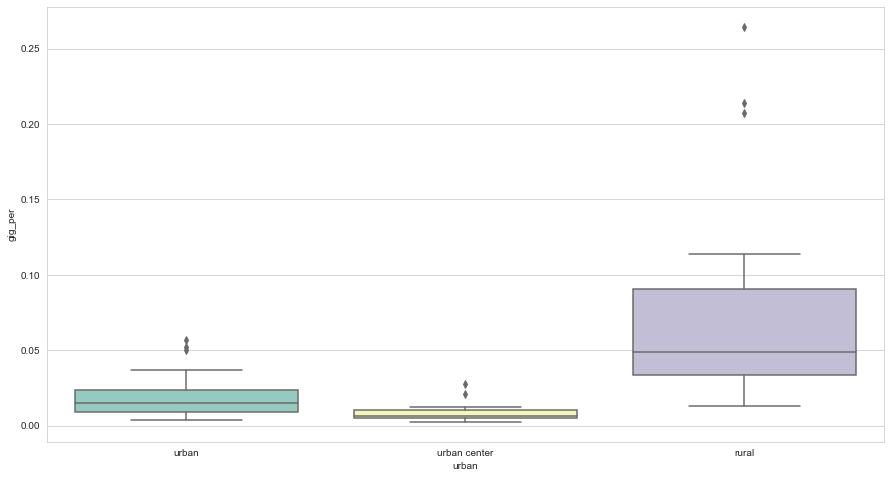

In [10]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="urban", y="gig_per",               
data=df, palette="Set3")

In [11]:
urban = df[df["urban"]=='urban']['gig_per']
urban_center = df[df["urban"]=='urban center']['gig_per']
rural = df[df["urban"]=='rural']['gig_per']

In [12]:
def hist_data(data):
    plt.hist(data, color = 'c', edgecolor='black',alpha=0.65,bins = 15)
    plt.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data.mean()*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(data.mean()))  

In [13]:
def hist_all(labels,*data):
    plt.figure(figsize=(17,8))
    i = 0
    op = 0.7
    c = list(mcolors.BASE_COLORS.keys())
    plt.hist(data,color = c[:len(labels)], alpha=op-i*0.2,bins = 30, label = labels, range = [0,0.25])
    plt.xlabel('percentage of gig workers')
    plt.title(' vs. '.join(labels)+' histogram')
    plt.legend()
    plt.show()

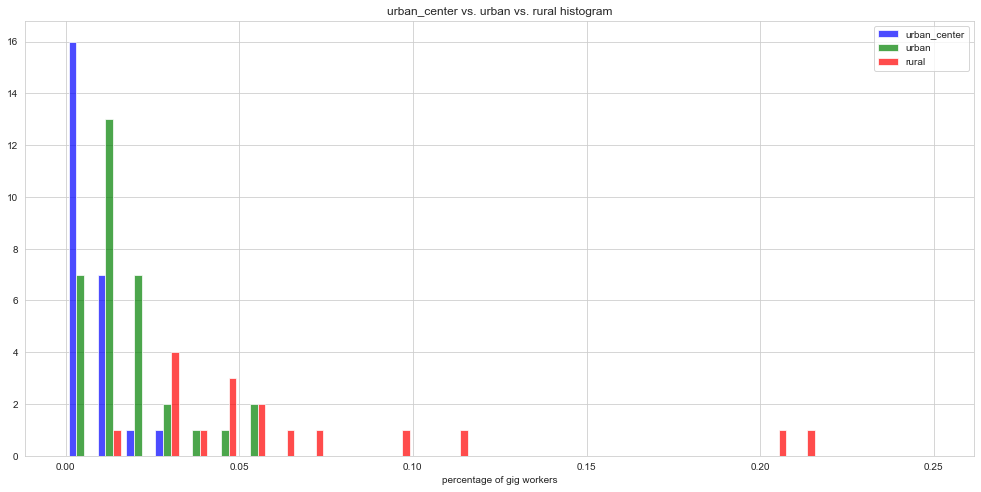

In [14]:
hist_all(['urban_center','urban','rural'],urban_center,urban,rural)

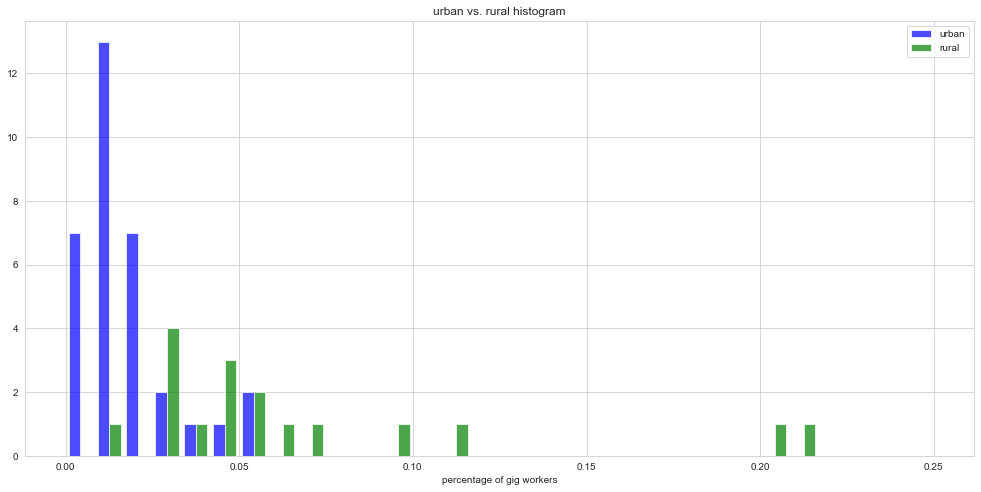

In [15]:
hist_all(['urban','rural'],urban,rural)

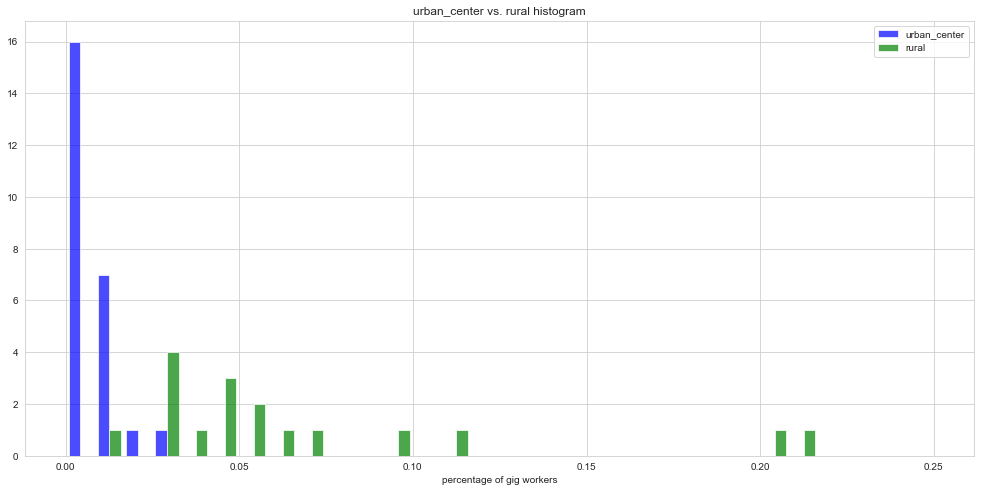

In [16]:
hist_all(['urban_center','rural'],urban_center,rural)

In [17]:
df_count = df_density.merge(df_count,on = 'Post Code', how = 'left')
df_count['Counts'] = df_count['Counts'].fillna(0)
df_count = df_count.drop(['City','Region'],axis=1)
df_count = df_count.dropna(subset = ['Density','Population'])
df_count['gig_per'] = 100*df_count['Counts']/df_count['Population']
df_count = df_count.rename(columns={'Counts': 'gig_num'})
df_count

,Unnamed: 0,Post Code,Area,Population,Density,gig_num,gig_per
0,0,1000,14.100,4072.0,288.794326,0.0,0.0
3,3,1003,0.820,6707.0,8179.268293,0.0,0.0
4,4,1004,2.272,31230.0,13745.598592,0.0,0.0
5,5,1005,1.585,12386.0,7814.511041,0.0,0.0
6,6,1006,1.553,15391.0,9910.495815,0.0,0.0
...,...,...,...,...,...,...,...
3517,3517,9411,5.100,701.0,137.450980,0.0,0.0
3519,3519,9426,1.381,931.0,674.149167,0.0,0.0
3520,3520,9427,6.900,1846.0,267.536232,0.0,0.0
3521,3521,9428,7.000,1995.0,285.000000,0.0,0.0


In [18]:
def draw_worker_density(xv,yv,df):
    plt.figure(figsize=(10, 6), dpi=80)
    ax = sns.scatterplot(x=xv, y=yv, data=df)
    ax.set_title(yv+" vs. "+xv)
    ax.set_xlabel(xv)

In [19]:
from scipy import stats
def draw_corr(df,col1, col2):
    draw_worker_density(col1,col2,df)
    p = stats.pearsonr(df[col1], df[col2])
    s = stats.spearmanr(df[col1], df[col2])
    k = stats.kendalltau(df[col1], df[col2])
    print(f'pearson r: {p[0]}, p value: {p[1]}')
    print(f'Spearman rho: {s[0]}, p value: {s[1]}')
    print(f'kendall tau: {k[0]}, p value: {k[1]}')

pearson r: -0.3050899573107293, p value: 0.007365580170445451
Spearman rho: -0.7659844973957266, p value: 7.555528812719142e-16
kendall tau: -0.5717795717795717, p value: 2.752414806398965e-13


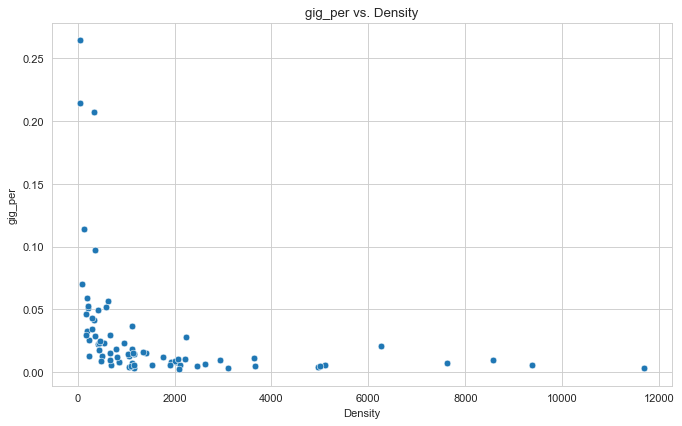

In [20]:
draw_corr(df,'Density','gig_per')

pearson r: 0.007957052566741936, p value: 0.6538139298915453
Spearman rho: 0.16653246739110214, p value: 3.3268158769873474e-21
kendall tau: 0.13452812516380483, p value: 9.470553631858983e-21


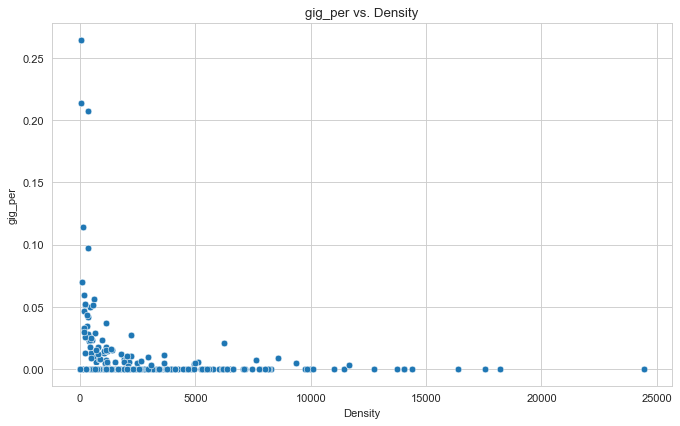

In [21]:
draw_corr(df_count,'Density','gig_per')